<a href="https://colab.research.google.com/github/annanasnas/digital_signal_processing/blob/main/%D0%A1P2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Самостоятельная работа №2**

Написать программу, позволяющую реализовать тональный набор: при
вводе информации в виде цифры от 0 до 9 включается аудиовоспроизведение
данного сигнала (время воспроизведения – 0,5 секунды). Частоту
дискретизации взять равной 10 кГц. Информацию по частотам
соответствующих синусоид смотреть здесь смотреть здесь:
https://en.wikipedia.org/wiki/Dual-tone_multi-frequency_signaling#Keypad.

Применить алгоритм Гёрцеля: добавить расчёт спектра для сигнала,
кодирующего введённую цифру, при помощи алгоритма Гёрцеля.

### Выполнили:

Сюракшина Анастасия БИБ191, 
Холодов Даниил БИБ191

# Реализация тонального набора

## Основное задание

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from IPython import display

In [ ]:
f1_case = {
    0: 941,
    1: 697,
    2: 697,
    3: 697,
    4: 770,
    5: 770,
    6: 770,
    7: 852,
    8: 852,
    9: 852
}
f2_case = {
    0: 1336,
    1: 1209,
    2: 1336,
    3: 1477,
    4: 1209,
    5: 1336,
    6: 1477,
    7: 1209,
    8: 1336,
    9: 1477
}

In [ ]:
n = int(input('Введите число от 0 до 9: '))
f1 = f1_case[n]
f2 = f2_case[n]

Введите число от 0 до 9: 5


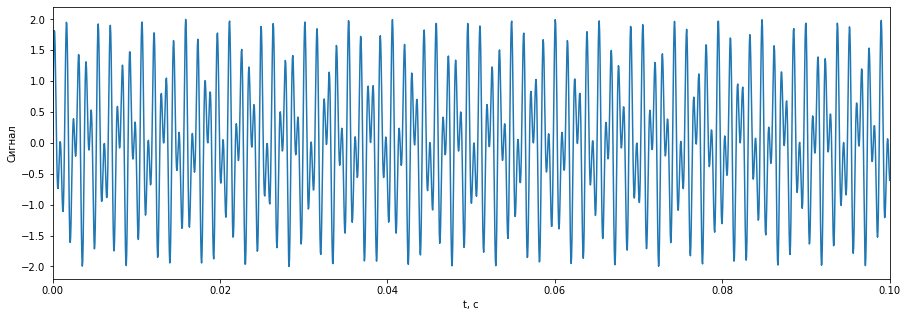

In [ ]:
fs=10000 # частота дискретизации
t = np.linspace(0, 0.5, fs)
signal = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

plt.figure(figsize=(15,5))
plt.plot(t, signal)
plt.xlabel('t, с')
plt.ylabel('Сигнал')
plt.xlim(0, 0.1)
plt.show()

In [ ]:
display.Audio(signal, rate=fs)

Искажение сигнала произошло в результате алиасинга

## Уменьшение частоты дискретизации

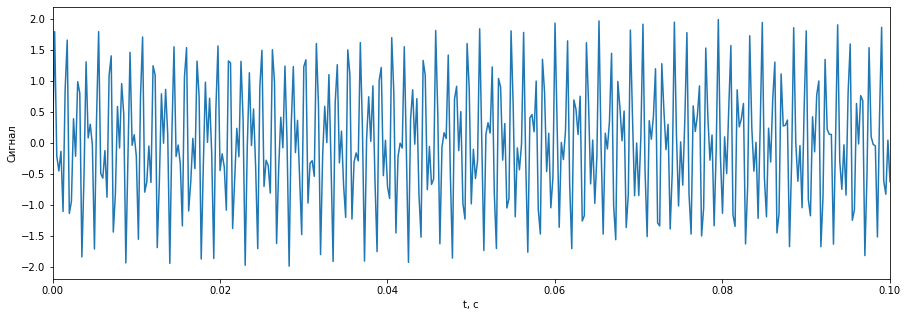

In [ ]:
fs=2000 # частота дискретизации
t = np.linspace(0, 0.5, fs)
signal_new = np.sin(2*np.pi*f1*t) + np.sin(2*np.pi*f2*t)

plt.figure(figsize=(15,5))
plt.plot(t, signal_new)
plt.xlabel('t, с')
plt.ylabel('Сигнал')
plt.xlim(0, 0.1)
plt.show()

In [ ]:
display.Audio(signal_new, rate=10000)

Искажение сигнала произошло в результате **алиасинга**

# Алгоритм Гёрцеля

## Основное задание

In [ ]:
!pip install git+https://github.com/NaleRaphael/goertzel-fft.git

  Cloning https://github.com/NaleRaphael/goertzel-fft.git to /tmp/pip-req-build-t_tfcic1
  Running command git clone -q https://github.com/NaleRaphael/goertzel-fft.git /tmp/pip-req-build-t_tfcic1


In [ ]:
import numpy as np
import gofft

fs = 10000                                  # sampling frequency
ft = [697, 770, 852, 941, 1209, 1336, 1477] # target frequency to be evaluated 
dur = 0.5                                   # duration of signal
num = int(fs*dur)                           # sampling points
t = np.linspace(0, dur, num)                # time series
data = signal                               # signal to be evaluated

gofft.alg.goertzel_m(data, fs, ft, fs)

array([1.25086542e-03, 4.16222385e-04, 2.60239780e-04, 1.92781467e-04,
       1.16464305e-04, 9.99221086e-05, 8.69923078e-05])

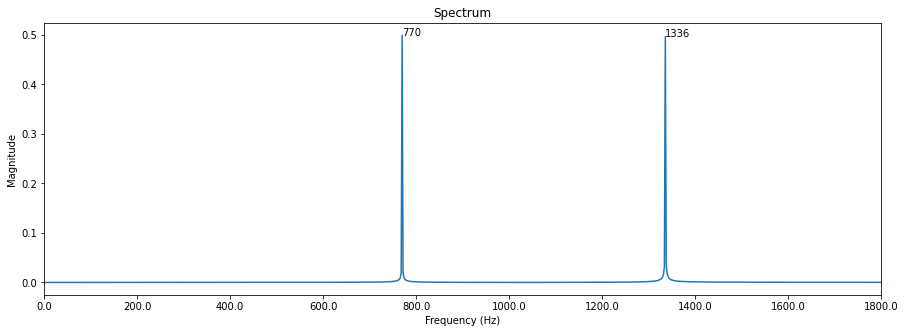

In [ ]:
from scipy.fftpack import fft as scipyfft
import matplotlib.ticker as tick

spectrum = np.abs(scipyfft(data)) / data.size

def more_than(ar,value):
  return ar[ar > value]
arr = list(set(more_than(spectrum, 0.3)))
f = []
for item in arr:
  f.append(round(np.where(np.isclose(spectrum, item))[0][0]/num*fs))

fig, ax = plt.subplots()
fig.set_size_inches(15, 5)
plt.plot(spectrum[:1477])

ax.xaxis.set_major_formatter(tick.FuncFormatter(lambda x, pos: x*2))
ax.set_xlim(0, 900)
ax.set_title('Spectrum')
ax.set_xlabel('Frequency (Hz)')
ax.set_ylabel('Magnitude')

ax.annotate('%.f'%(f[0]), xy = (spectrum.tolist().index(arr[0]), arr[0]))
ax.annotate('%.f'%(f[1]), xy = (spectrum.tolist().index(arr[1]), arr[1]))

plt.show()

## Декодирование обратно в соответствующие частоты

In [ ]:
def more_than(ar,value):
  return ar[ar > value]
arr = list(set(more_than(spectrum, 0.3)))
f = []
for item in arr:
  f.append(round(np.where(np.isclose(spectrum, item))[0][0]/num*fs))

print('Найденные частоты:', *f)

Найденные частоты: 770 1336


## Алгоритм Гёрцеля, используя свертку и импульсную характеристику

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:9: ComplexWarning: Casting complex values to real discards the imaginary part
  if __name__ == '__main__':


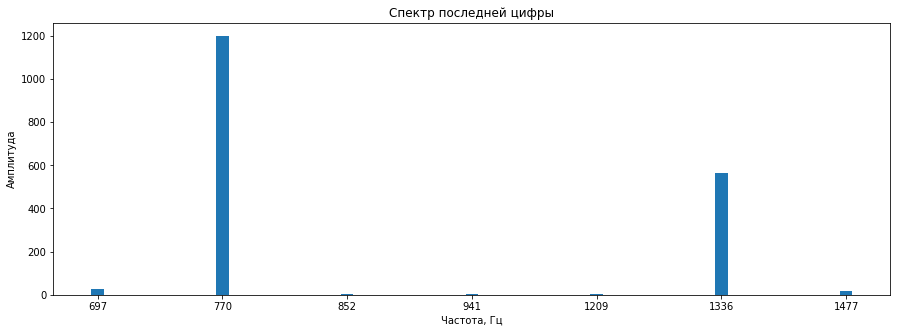

In [ ]:
dft_data = np.zeros(len(ft))
freq_x = []
for item in ft:
  freq_x.append(round(item/fs*len(t)))
for i in range(len(ft)):
  k = freq_x[i]
  h = np.zeros(len(t))
  for n in range(len(t)):
    h[n] = np.exp(-1j * 2 * np.pi * k) * np.exp(1j * 2 * np.pi * k * n / fs)
  con = np.convolve(h, signal, 'same')
  dft_data[i] = con[-1]

x = []
for i in range(len(ft)):
  x.append(str(ft[i]))
plt.figure(figsize=(15,5))
plt.bar(x, abs(dft_data), width=0.1)


# fig, ax = plt.subplots()
# fig.set_size_inches(15, 5)
# plt.bar(ft, abs(dft_data))
# ax.set_xticks(ft)

plt.title('Спектр последней цифры')
plt.xlabel('Частота, Гц')
plt.ylabel('Амплитуда')
plt.show()